In [11]:
# Clear all existing variables
%reset -f

In [12]:
#packages
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Widening the screen
from matplotlib import rcParams
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
# Widening the screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
FS=20
rcParams['figure.dpi'] = 1800
rcParams['savefig.dpi'] = 800
rcParams['font.size'] = FS
rcParams['font.family'] = 'StixGeneral'
rcParams["mathtext.fontset"] = 'stix'
# rcParams["mathtext.default"] = "rm" 
# rcParams['xtick.direction'] = 'in'
plt.rc('font', size=FS)          # controls default text sizes
plt.rc('axes', titlesize=FS)     # fontsize of the axes title
plt.rc('axes', labelsize=FS)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=FS)    # fontsize of the tick labels
plt.rc('ytick', labelsize=FS)    # fontsize of the tick labels
plt.rc('legend', fontsize=FS)    # legend fontsize
plt.rc('figure', titlesize=FS)   # fontsize of the figure title

In [14]:
import pandas
# pd.DataFrame(Me).to_csv("ModelDataSa.csv",index=False,sep=',')
ModelDataSa = pandas.read_csv('ModelDataSa.csv',header=0)
ModelDataSa = ModelDataSa.values.tolist()

[0.62144737 0.63723138 0.65301539 0.66879939 0.6845834  0.70036741
 0.71615142 0.73193543 0.74771944 0.76350345 0.77928745 0.79507146
 0.81085547 0.82663948 0.84242349 0.8582075  0.8739915  0.88977551
 0.90555952 0.92134353 0.93712754 0.95291155]
[0.61985227 0.63478962 0.65051315 0.66623667 0.6819602  0.69768373
 0.71340725 0.72913078 0.74485431 0.76057784 0.77630137 0.79202518
 0.80775602 0.82361307 0.84090666 0.86346988 0.88368452 0.89616989
 0.90639429 0.91884747 0.93363347 0.94926481]
[0.5686899  0.58239432 0.59682004 0.61124575 0.62567146 0.64009718
 0.65452289 0.6689486  0.68337432 0.69780006 0.71222621 0.72665824
 0.74116336 0.75648914 0.77904707 0.83531644 0.92062196 0.96334894
 0.97073447 0.95223271 0.9056743  0.88523267]
[0.48372773 0.49538472 0.50765523 0.51992575 0.53219626 0.54446678
 0.55673729 0.56900781 0.58127834 0.5935491  0.60582247 0.61812362
 0.63070013 0.64578194 0.67843966 0.77715418 0.92986697 1.00820129
 1.0254659  0.99408816 0.88654165 0.81715794]
[0.41463372 

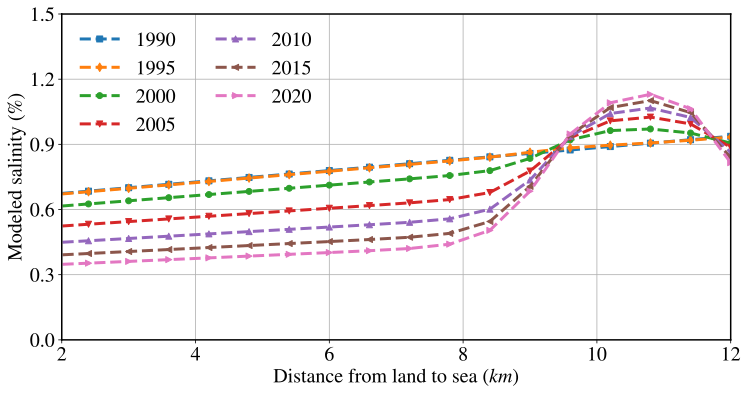

In [15]:
nticker = 6
LX =435
from matplotlib import ticker
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

ModelDataSaX = np.linspace(0.0, (LX-1.0)*30.0/1000.0,LX)
lenModelDataSaX = len(ModelDataSaX)
inter = 20 # 间隔
ModelDataSaXinter = ModelDataSaX[0:lenModelDataSaX:inter]


markers=("s","d","o","v","^","<",">","p","P","*","h","H","+","x","X","D","|",".","_")
n=0
for m in (1990,1995,2000,2005,2010,2015,2020):#dfe['Year'].drop_duplicates().sort_values():
    #pSalData, = ax.plot(x2010, y2010, 'bo', markerfacecolor='none', markersize=10, label='Data')
    ModelDataSaY = np.flipud(ModelDataSa[m-1990])
    ModelDataSaYinter = ModelDataSaY[0:lenModelDataSaX:inter]
    pSalSim,  = ax.plot(ModelDataSaXinter, ModelDataSaYinter, lw=3, label='%d'%(m), marker=markers[n],linestyle='--') 
    print(ModelDataSaYinter)
    n=n+1


ax.set_xlim(2.0, 12.0)
ax.set_xticks(np.linspace(2.0, 12.0, nticker))

ax.set_ylim(0.0, 1.5)
ax.set_yticks(np.linspace(0.0, 1.5, nticker))

# ax.set_title('Salinity of data and simulation')
ax.set_xlabel("Distance from land to sea ($km$)")
ax.set_ylabel("Modeled salinity (%)")

ax.spines['bottom'].set_linewidth(1.5);
ax.spines['left'].set_linewidth(1.5);
ax.spines['right'].set_linewidth(1.5);
ax.spines['top'].set_linewidth(1.5);

ax.legend(fontsize=FS,frameon=False,ncol=2,loc=0)
ax.grid()

# plt.show()
plt.savefig('Figure S2d Modelled  salinity time series data.pdf', bbox_inches='tight')

In [16]:
SaXPh =np.zeros((7,9))#(time, loc)
SaYPh =np.zeros((7,9))
SaXSu =np.zeros((7,5))
SaYSu =np.zeros((7,5))
SaXSp =np.zeros((7,8))
SaYSp =np.zeros((7,8))

LX =435
ModelDataSaX = np.linspace(0.0, (LX-1.0)*30.0/1000.0,LX)
lenModelDataSaX = len(ModelDataSaX)
inter = 20 # 间隔
ModelDataSaXinter = ModelDataSaX[0:lenModelDataSaX:inter]

n=0
for m in (1990,1995,2000,2005,2010,2015,2020):#dfe['Year'].drop_duplicates().sort_values():
    ModelDataSaY = np.flipud(ModelDataSa[m-1990])
    ModelDataSaYinter = ModelDataSaY[0:lenModelDataSaX:inter]
    SaXPh[n,:]=ModelDataSaXinter[(ModelDataSaXinter<5)]
    SaYPh[n,:]=ModelDataSaYinter[(ModelDataSaXinter<5)]
    SaXSu[n,:]=ModelDataSaXinter[(ModelDataSaXinter>5) & (ModelDataSaXinter<8)]
    SaYSu[n,:]=ModelDataSaYinter[(ModelDataSaXinter>5) & (ModelDataSaXinter<8)]
    SaXSp[n,:]=ModelDataSaXinter[(ModelDataSaXinter>8)]
    SaYSp[n,:]=ModelDataSaYinter[(ModelDataSaXinter>8)]
    n=n+1

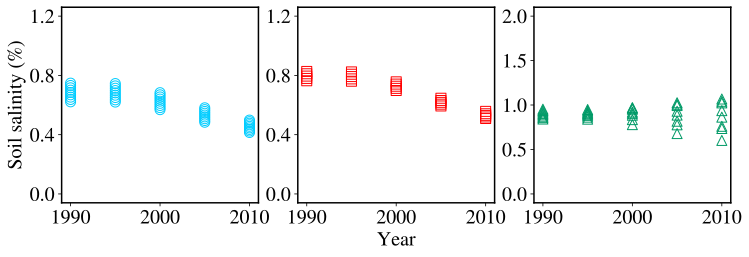

In [17]:
nticker = 4
from matplotlib import ticker
fig, ax = plt.subplots(1, 3, figsize=(12, 3.6))

for mm in range(9):
    pSalData, = ax[0].plot((1990,1995,2000,2005,2010), SaYPh[0:5,mm], color='#00CCFF', lw=0, marker='o', markerfacecolor='none', markersize=10)
for mm in range(5):
    pSalData, = ax[1].plot((1990,1995,2000,2005,2010), SaYSu[0:5,mm], color='r',       lw=0, marker='s', markerfacecolor='none', markersize=10)
for mm in range(8):
    pSalData, = ax[2].plot((1990,1995,2000,2005,2010), SaYSp[0:5,mm], color='#009966', lw=0, marker='^', markerfacecolor='none', markersize=10)

# for mm in range(9):
#     pSalData, = ax[0].plot((1990,1995,2000,2005,2010,2015,2020), SaYPh[0:7,mm], color='#00CCFF', lw=0, marker='o', markerfacecolor='none', markersize=10)
# for mm in range(5):
#     pSalData, = ax[1].plot((1990,1995,2000,2005,2010,2015,2020), SaYSu[0:7,mm], color='r',       lw=0, marker='s', markerfacecolor='none', markersize=10)
# for mm in range(8):
#     pSalData, = ax[2].plot((1990,1995,2000,2005,2010,2015,2020), SaYSp[0:7,mm], color='#009966', lw=0, marker='^', markerfacecolor='none', markersize=10)
# import seaborn as sns
# sns.regplot(x=np.array([1990,1995,2000,2005,2010]), y=SaYPh[0:5,5], marker="o", order=4, ci=60, truncate=False)

ax[0].set_ylim(-0.06, 1.26)
ax[0].set_yticks(np.linspace(0.0, 1.2, nticker))
ax[1].set_ylim(-0.06, 1.26)
ax[1].set_yticks(np.linspace(0.0, 1.2, nticker))
ax[2].set_ylim(-0.1, 2.1)
ax[2].set_yticks(np.linspace(0.0, 2.0, 5))

ax[1].set_xlabel("Year")
ax[0].set_ylabel("Soil salinity (%)")

ax[0].spines['bottom'].set_linewidth(1.5);
ax[0].spines['left'].set_linewidth(1.5);
ax[0].spines['right'].set_linewidth(1.5);
ax[0].spines['top'].set_linewidth(1.5);
ax[1].spines['bottom'].set_linewidth(1.5);
ax[1].spines['left'].set_linewidth(1.5);
ax[1].spines['right'].set_linewidth(1.5);
ax[1].spines['top'].set_linewidth(1.5);
ax[2].spines['bottom'].set_linewidth(1.5);
ax[2].spines['left'].set_linewidth(1.5);
ax[2].spines['right'].set_linewidth(1.5);
ax[2].spines['top'].set_linewidth(1.5);

# ax.legend(fontsize=FS,frameon=False,ncol=1,loc=0)
# ax[0].grid()
# plt.show()
plt.savefig('Figure S2efg Modelled and observed salinity data.pdf', bbox_inches='tight')

© 2021, Kang Zhang, ECNU. Follow Johan van de Koppel & Quan-Xing Liu.